## Q.21. 直方图归一化（ Histogram Normalization ）

> 关于直方图的几个操作的中文翻译一直都十分混乱（成龙抓头.jpg）。下面是我查了资料做的一个对照表，仅供参考：
>
> |         中文         |               English                |            日本語            |             具体作用             |
> | :------------------: | :----------------------------------: | :--------------------------: | :------------------------------: |
> | 直方图匹配（规定化） | Histogram Matching ( Specification ) |    ヒストグラムマッチング    | 将两张图像的累积分布函数调为一样 |
> |     直方图均衡化     |        Histogram Equalization        | ヒストグラム均等化（平坦化） |     拉开灰度差别，增强对比度     |
> |     直方图归一化     |       Histogram Normalization        |      ヒストグラム正規化      |  将直方图所有分量限制在一定范围  |
>
> ——gzr

来归一化直方图吧！

有时直方图会存在偏差。比如说，数据集中在 0 处（左侧）的图像全体会偏暗，数据集中在255 处（右侧）的图像会偏亮。如果直方图有所偏向，那么其[动态范围（ dynamic range ）](https://zh.wikipedia.org/wiki/%E5%8A%A8%E6%80%81%E8%8C%83%E5%9B%B4)就会较低。为了使人能更清楚地看见图片，让直方图归一化、平坦化是十分必要的。

这种归一化直方图的操作被称作灰度变换（Grayscale Transformation）。像素点取值范围从 [c,d] 转换到 [a,b] 的过程由下式定义。这回我们将`imori_dark.jpg`的灰度扩展到 [0, 255] 范围。

```bash
xout = {  a                         (xin < c)
         (b-a)/(d-c) * (xin-c) + a  (c <= xin <= d)
          b                         (d < xin)
```

| 输入 (imori_dark.jpg) | 输出 (answers/answer_21_1.jpg) | 直方图(answers/answer_21_2.png) |
| :-------------------: | :----------------------------: | :-----------------------------: |
|  ![](imori_dark.jpg)  |  ![](answers/answer_21_1.jpg)  |  ![](answers/answer_21_2.png)   |


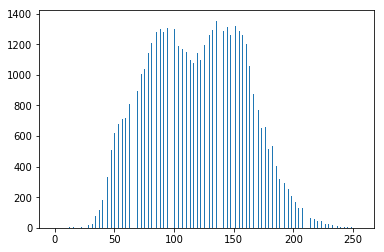

-1

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori_dark.jpg")

a = 0
b = 255
c = img.min()
d = img.max()

out = img.copy()

"""
#方法一：
for i in range(len(out)):
    for j in range(len(out)):
        for k in range(3):
            if (out[i,j,k] < c):
                out[i,j,k] = a
            elif ((c <= out[i,j,k]) & (out[i,j,k] < d)):
                out[i,j,k] = (b-a)/(d-c)*(out[i,j,k] - c) + a
            else:
                out[i,j,k] = b
"""
#方法二：
out[out<a] = a
out[out>b] = b
out = (b-a) / (d - c) * (out - c) + a
out = out.astype(np.uint8)

plt.hist(out.ravel(),bins = 255,rwidth = 0.8,range = (0,255))
plt.show()

cv2.imshow('',out)
cv2.waitKey(0)

## Q.22. 直方图操作

让直方图的平均值m0=128，标准差s0=52​吧！

这里并不是变更直方图的动态范围，而是让直方图变得平坦。

可以使用下式将平均值为m标准差为s的直方图变成平均值为m0标准差为s0的直方图：

```bash
xout = s0 / s * (xin - m) + m0
```

| 输入 (imori_dark.jpg) | 输出 (answers/answer_22_1.jpg) | 直方图(answers/answer_22_2.png) |
| :-------------------: | :----------------------------: | :-----------------------------: |
|  ![](imori_dark.jpg)  |  ![](answers/answer_22_1.jpg)  |  ![](answers/answer_22_2.png)   |

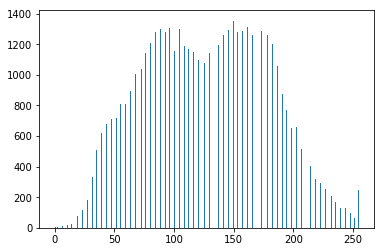

-1

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori_dark.jpg")#.astype(np.float)

m0 = 128
s0 = 52

m = np.mean(img)
s = np.std(img)

out = img.copy()

out = s0 / s * (out - m) + m0

out[out<0] = 0
out[out>255] = 255

out = out.astype(np.uint8)

plt.hist(out.ravel(),bins = 255,rwidth = 0.8,range = (0,255))
plt.show()

cv2.imshow('',out)
cv2.waitKey(0)


## Q.23. 直方图均衡化（ Histogram Equalization ）

来让均匀化直方图吧！

直方图均衡化是使直方图变得平坦的操作，是不需要计算上面的问题中的平均值、标准差等数据使直方图的值变得均衡的操作。

均衡化操作由以下式子定义。S是总的像素数；Zmax是像素点的最大取值（在这里是 255）；h(z)表示取值为z的累积分布函数：

```bash
Z' = Zmax / S * Sum{i=0:z} h(z)
```

| 输入 (imori.jpg) | 输出 (answers/answer_23_1.jpg) | 直方图(answers/answer_23_2.png) |
| :--------------: | :----------------------------: | :-----------------------------: |
|  ![](imori.jpg)  |  ![](answers/answer_23_1.jpg)  |  ![](answers/answer_23_2.png)   |

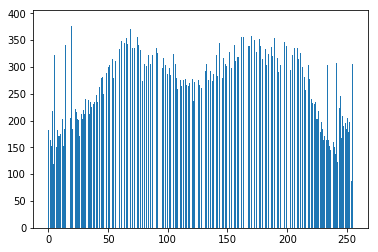

-1

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori.jpg")
H,W,C = img.shape

S = H*W*C*1.

Zmax = 255.
sum_h = 0.

out = img.copy()

for i in range(1,255):
    ind = np.where(img == i)
    sum_h +=len(img[ind])
    out[ind] = Zmax / S *sum_h

out = out.astype(np.uint8)

plt.hist(out.ravel(),bins = 255,rwidth = 0.8,range=(0,255))
plt.show()

cv2.imshow('',out)
cv2.waitKey(0)

## Q.24. 伽玛校正（Gamma Correction）

> [这里](https://blog.csdn.net/candycat1992/article/details/46228771)是一篇写伽马校正比较好的文章，我觉得可以作为背景知识补充。
>
> ——gzr

对`imori_gamma.jpg`进行伽马校正（c=1,g=2.2）吧！

伽马校正用来对照相机等电子设备传感器的非线性光电转换特性进行校正。如果图像原样显示在显示器等上，画面就会显得很暗。伽马校正通过预先增大 RGB 的值来排除显示器的影响，达到对图像修正的目的。

由于下式引起非线性变换，在该式中，x被归一化，限定在[0,1]范围内。c是常数，g为伽马变量（通常取2.2）：

```bash
x' = c * Iin ^ g
```

因此，使用下面的式子进行伽马校正：

```bash
Iout = (1/c * Iin) ^ (1/g)
```

![](question_24_1.jpg)   ![](question_24_2.jpg)

| 输入 (imori_gamma.jpg) | 输出 (answers/answer_24.jpg) |
| :--------------------: | :--------------------------: |
|  ![](imori_gamma.jpg)  |  ![](answers/answer_24.jpg)  |

In [1]:
import cv2
import numpy as np
#import matplotlib.pyplot as plt

img = cv2.imread("imori_gamma.jpg").astype(np.float)

c =1.
g = 2.2

out = img.copy()

out /= 255

out = (1/c*out)**(1/g)

out *= 255

out = out.astype(np.uint8)

cv2.imshow('',out)
cv2.waitKey(0)
cv2.destroyAllWindows()

13

## Q.25. 最邻近插值（ Nearest-neighbor Interpolation ）

使用最邻近插值将图像放大1.5倍吧！

最近邻插值在图像放大时补充的像素取最临近的像素的值。由于方法简单，所以处理速度很快，但是放大图像画质劣化明显。  
src 10x20 dst 5x10<br>
dst<-src 目标图像上的每一个点都来自原图像<br>
例：(1,2)<-(2,4)<br>
dst x 1 -> src x 2 newX<br>
newX = x*(src 行/dst 行) newX = 1x(10/5)=2<br>
newY = x*(src 列/dst 列) newY = 2x(20/10)=4<br>
12.3=12 取离整数最近的数<br>

使用下面的公式放大图像吧！I'为放大后图像，I为放大前图像，a为放大率，方括号为取整操作：

```bash
I'(x,y) = I([x/a], [y/a])
```
| 输入 (imori.jpg) | 输出 (answers/answer_25.jpg) |
| :--------------: | :--------------------------: |
|  ![](imori.jpg)  |  ![](answers/answer_25.jpg)  |


In [94]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg")
H,W,C = img.shape

a = 1.5
dstH = int(H*a)
dstW = int(W*a)
out = img.copy()
tmp = np.zeros((dstH,dstW,C),dtype=np.uint8)
"""
#方法一
for i in range(dstH):
    for j in range(dstW):
        tmp[i,j] = out[int(i*(H/dstH)),int(j*(W/dstW))]
"""
#方法二
i = np.arange(dstH).repeat(dstW).reshape(dstW, -1) #定义一个(dstH,dstW)的矩阵


j =i.T# np.tile(np.arange(dstW), (dstH, 1))

i = np.round(i / a).astype(np.int)
j = np.round(j / a).astype(np.int)

out = img[i,j]

tmp = out.astype(np.uint8)

cv2.imshow('',tmp)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Q.26. 双线性插值（ Bilinear Interpolation ）

使用双线性插值将图像放大1.5倍吧！

双线性插值考察4邻域的像素点，根据距离设置权值。虽然计算量增大使得处理时间变长，但是可以有效抑制画质劣化。  

在双线性插值中，我们考虑到dst图像中某个像素点对应回src图像中是在几个像素点之间。例如dst某个像素点对应回src中的坐标为（x, y）,x, y如果不是整数的话，那么相关的像素点就有四个，(x, y), (x+1, y), (x+1, y+1), (x, y+1)。
具体公式如下：
```bash
dst[x,y]=src[x′,y′]=(1−a)(1−b)src[x′+1,y′+1]+(1−a)b∗src[x′+1,y′]+(1−b)a∗src[x′,y′+1]+ab∗src[x′][y′] 

PS：x’, y’是对最近邻插值得到的值取整，a为对于src_x的余数， b为src_y的余数。
```

1. 放大图像的座标(x',y')除以放大率a，得到对应原图像的座标floor(x'/a, y'/a)。
2. 求原图像的座标(x'/a, y'/a)周围4邻域的座标I(x,y), I(x+1,y), I(x,y+1), I(x+1, y+1)

```bash
I(x,y)    I(x+1,y) 
     * (x'/a,y'/a)
I(x,y+1)  I(x+1,y+1)
```

3. 分别求这4个点与(x'/a, y'/a)的距离，根据距离设置权重：w = d / Sum d
4. 根据下式求得放大后图像(x',y')处的像素值：
dx = x'/a - x , dy = y'/a - y
```bash
I'(x',y') = (1-dx)(1-dy)I(x,y) + dx(1-dy)I(x+1,y) + (1-dx)dyI(x,y+1) + dxdyI(x+1,y+1)
```

| 输入 (imori.jpg) | 输出 (answers/answer_26.jpg) |
| :--------------: | :--------------------------: |
|  ![](imori.jpg)  |  ![](answers/answer_26.jpg)  |

In [93]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg")
H,W,C = img.shape

a = 1.5

dstH = int(a * H)
dstW = int(a * W)

out = img.copy()
#方法一：
i = np.arange(dstH).repeat(dstW).reshape(dstW, -1)
j = np.tile(np.arange(dstW), (dstH, 1))

i = (i / a)
j = (j / a)

ix = np.floor(x).astype(np.int)
iy = np.floor(y).astype(np.int)

ix = np.minimum(ix, W-2)
iy = np.minimum(iy, H-2)

dx = j - ix
dy = i - iy


dx = np.repeat(np.expand_dims(dx, axis=-1), 3, axis=-1)

dy = np.repeat(np.expand_dims(dy, axis=-1), 3, axis=-1)


dst_out = (1-dx) * (1-dy) * img[iy, ix] + \
            dx * (1 - dy) * img[iy, ix+1] + \
            (1 - dx) * dy * img[iy+1, ix] + \
             dx * dy * img[iy+1, ix+1]

dst_out[dst_out>255] = 255
"""
#方法二：
dst_out = np.zeros((dstH,dstW,3))

for i in range(dstH):
    for j in range(dstW):
        src_j = j*float(W/dstW)
        src_i = i*float(H/dstH)
        src_j_int = j*W//dstW
        src_i_int = i*H//dstH
        a = src_j - src_j_int
        b = src_i - src_i_int
        
        if src_j_int+1 == W or src_i_int+1 == H:
                dst_out[i, j, :] = out[src_j_int, src_i_int, :]
                continue

        dst_out[i,j,:] = (1 - a)*(1 - b) * out[src_i_int+1,src_j_int+1,:] + \
        (1 - a) * b * out[src_i_int ,src_j_int+1,:] + \
        a * (1 - b) * out[src_i_int+1,src_j_int,:] + \
        a * b * out[src_i_int,src_j_int,:]
"""
dst_out = dst_out.astype(np.uint8)

cv2.imshow('',dst_out)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Q.27. 双三次插值（ Bicubic Interpolation ）

使用双三次插值将图像放大1.5倍吧！

双三次插值是双线性插值的扩展，使用邻域16像素进行插值。

```bash
I(x-1,y-1)  I(x,y-1)  I(x+1,y-1)  I(x+2,y-1)
I(x-1,y)    I(x,y)    I(x+1,y)    I(x+2,y)
I(x-1,y+1)  I(x,y+1)  I(x+1,y+1)  I(x+2,y+1)
I(x-1,y+2)  I(x,y+2)  I(x+1,y+2)  I(x+2,y+2)
```

各自像素间的距离由下式决定：

```bash
dx1 = x'/a - (x-1) , dx2 = x'/a - x , dx3 = (x+1) - x'/a , dx4 = (x+2) - x'/a
dy1 = y'/a - (y-1) , dy2 = y'/a - y , dy3 = (y+1) - y'/a , dy4 = (y+2) - y'/a
```

基于距离的权重函数由以下函数取得，a在大部分时候取-1：

```bash
h(t) = { (a+2)|t|^3 - (a+3)|t|^2 + 1    (when |t|<=1)
         a|t|^3 - 5a|t|^2 + 8a|t| - 4a  (when 1<|t|<=2)
         0                              (when 2<|t|) 
```

利用上面得到的权重，通过下面的式子扩大图像。将每个像素与权重的乘积之和除以权重的和。

```bash
I'(x', y') = (Sum{i=-1:2}{j=-1:2} I(x+i,y+j) * wxi * wyj) / Sum{i=-1:2}{j=-1:2} wxi * wyj
```

| 输入 (imori.jpg) | 输出 (answers/answer_27.jpg) |
| :--------------: | :--------------------------: |
|  ![](imori.jpg)  |  ![](answers/answer_27.jpg)  |

In [96]:
import cv2
import numpy as np


# Read image
img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape


# Bi-cubic
a = 1.5
aH = int(a * H)
aW = int(a * W)

y = np.arange(aH).repeat(aW).reshape(aW, -1)
x = np.tile(np.arange(aW), (aH, 1))
y = (y / a)
x = (x / a)

ix = np.floor(x).astype(np.int)
iy = np.floor(y).astype(np.int)

ix = np.minimum(ix, W-1)
iy = np.minimum(iy, H-1)

dx2 = x - ix
dy2 = y - iy
dx1 = dx2 + 1
dy1 = dy2 + 1
dx3 = 1 - dx2
dy3 = 1 - dy2
dx4 = 1 + dx3
dy4 = 1 + dy3

dxs = [dx1, dx2, dx3, dx4]
dys = [dy1, dy2, dy3, dy4]

def weight(t):
    a = -1.
    at = np.abs(t)
    w = np.zeros_like(t)
    ind = np.where(at <= 1)
    w[ind] = ((a+2) * np.power(at, 3) - (a+3) * np.power(at, 2) + 1)[ind]
    ind = np.where((at > 1) & (at <= 2))
    w[ind] = (a*np.power(at, 3) - 5*a*np.power(at, 2) + 8*a*at - 4*a)[ind]
    return w

w_sum = np.zeros((aH, aW, C), dtype=np.float32)
out = np.zeros((aH, aW, C), dtype=np.float32)

for j in range(-1, 3):
    for i in range(-1, 3):
        ind_x = np.minimum(np.maximum(ix + i, 0), W-1)
        ind_y = np.minimum(np.maximum(iy + j, 0), H-1)

        wx = weight(dxs[i+1])
        wy = weight(dys[j+1])
        wx = np.repeat(np.expand_dims(wx, axis=-1), 3, axis=-1)
        wy = np.repeat(np.expand_dims(wy, axis=-1), 3, axis=-1)

        w_sum += wx * wy
        out += wx * wy * img[ind_y, ind_x]

out /= w_sum
out[out>255] = 255
out = out.astype(np.uint8)

# Save result
cv2.imshow("result", out)
cv2.waitKey(0)



-1

## Q.28. 仿射变换（ Afine Transformations ）——平行移动

利用仿射变换让图像在x方向上+30，在y方向上-30吧！

仿射变换利用3x3的矩阵来进行图像变换。

变换的方式有平行移动（问题28）、放大缩小（问题29）、旋转（问题30）、倾斜（问题31）等。

原图像记为(x,y)，变换后的图像记为(x',y')。

图像放大缩小矩阵为下式：

```bash
[ x' ] = [a b][x]
  y'      c d  y
```

另一方面，平行移动按照下面的式子计算：

```bash
[ x' ] = [x] + [tx]
  y'      y  +  ty
```

把上面两个式子盘成一个：

```bash
  x'       a b tx    x
[ y' ] = [ c d ty ][ y ]
  1        0 0  1    1
```

特别的，使用以下的式子进行平行移动：

```bash
  x'       1 0 tx    x
[ y' ] = [ 0 1 ty ][ y ]
  1        0 0  1    1
```

| 输入 (imori.jpg) | 输出 (answers/answer_28.jpg) |
| :--------------: | :--------------------------: |
|  ![](imori.jpg)  |  ![](answers/answer_28.jpg)  |


In [199]:
import cv2
import numpy as np 

img = cv2.imread("imori.jpg")

H,W,C = img.shape

a = 1.
b = 0.
c = 0.
d = 1.
tx = 30
ty = -30

y = np.arange(H).repeat(W).reshape(W,-1)
x = np.tile(np.arange(W),(H,1))
out = np.zeros((H+1, W+1, C), dtype=np.float32)

xnew = a * x + b * y + tx
ynew = c * x + d * y + ty

xnew[xnew < 0] = 0
ynew[ynew < 0] = 0
xnew[xnew > W] = W
ynew[ynew > H] = H

xnew = xnew.astype(np.int)
ynew = ynew.astype(np.int)

out[ynew,xnew] = img[y,x]
out = out[:H,:W]
out = out.astype(np.uint8)

cv2.imshow('',out)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Q.29. 仿射变换（ Afine Transformations ）——放大缩小

1. 使用仿射变换，将图片在x方向上放大1.3倍，在y方向上缩小至0.8倍。
2. 在上面的条件下，同时在x方向上像右平移30（+30），在y方向上向上平移30（-30）。

| 输入 (imori.jpg) | 输出 (1) (answers/answer_29_1.jpg) | 输出 (2) (answers/answer_29_2.jpg) |
| :--------------: | :--------------------------------: | :--------------------------------: |
|  ![](imori.jpg)  |    ![](answers/answer_29_1.jpg)    |    ![](answers/answer_29_2.jpg)    |

In [198]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg")
H,W,C = img.shape

a = 1.
b = 0.
c = 0.
d = 1.
tx = 30
ty = -30

m = 1.3
n = 0.8
dstH = int(H*n)
dstW = int(W*m)
#out = img.copy()
tmp = np.zeros((dstH,dstW,C),dtype=np.uint8)

for i in range(dstH):
    for j in range(dstW):
        tmp[i,j] = img[int(i*(H/dstH)),int(j*(W/dstW))]
tmp = tmp.astype(np.uint8)

h,w,k = tmp.shape
y = np.arange(h).repeat(w).reshape(h,-1)
x = np.tile(np.arange(w),(h,1))


out = np.zeros((h+1, w+1, k), dtype=np.float32)

xnew = a * x + b * y + tx
ynew = c * x + d * y + ty

xnew[xnew<0]=0
ynew[ynew<0]=0
xnew[xnew>w]=w
ynew[ynew>h]=h

xnew = xnew.astype(np.int)
ynew = ynew.astype(np.int)

out[ynew,xnew] = tmp[y,x]
out = out[:h,:w]
out = out.astype(np.uint8)

cv2.imshow('tmp',tmp)
cv2.imshow('out',out)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Q.30. 仿射变换（ Afine Transformations ）——旋转

1. 使用仿射变换，逆时针旋转30度。
2. 使用仿射变换，逆时针旋转30度并且能让全部图像显现（也就是说，单纯地做仿射变换会让图片边缘丢失，这一步中要让图像的边缘不丢失，需要耗费一些工夫）。

使用下面的式子进行逆时针方向旋转A度的仿射变换：

```bash
  x'       cosA -sinA tx    x
[ y' ] = [ sinA  cosA ty ][ y ]
  1         0     0    1    1
```

| 输入 (imori.jpg) | 输出 (1) (answers/answer_30_1.jpg) | 输出 (2) (answers/answer_30_2.jpg) |
| :--------------: | :--------------------------------: | :--------------------------------: |
|  ![](imori.jpg)  |    ![](answers/answer_30_1.jpg)    |    ![](answers/answer_30_2.jpg)    |

In [210]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg")

H,W,C = img.shape

A = 30.
theta = np.pi*A/180.

a = np.cos(theta)
b = np.sin(theta)
c = -np.sin(theta)
d = np.cos(theta)
tx = 0
ty = 0

y = np.arange(H).repeat(W).reshape(W,-1)
x = np.tile(np.arange(W),(H,1))
out = np.zeros((H+1, W+1, C), dtype=np.float32)

xnew = a * x + b * y + tx
ynew = c * x + d * y + ty

xnew[xnew < 0] = 0
ynew[ynew < 0] = 0
xnew[xnew > W] = W
ynew[ynew > H] = H

xnew = xnew.astype(np.int)
ynew = ynew.astype(np.int)

out[ynew,xnew] = img[y,x]
out = out[:H,:W]

out = out.astype(np.uint8)


cv2.imshow('',out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
_img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = _img.shape


# Affine

A = 30.
theta = - np.pi * A / 180.

a = np.cos(theta)
b = -np.sin(theta)
c = np.sin(theta)
d = np.cos(theta)
tx = -20
ty = 30

y = np.arange(H).repeat(W).reshape(W,-1)
x = np.tile(np.arange(W),(H,1))
out = np.zeros((H+1, W+1, C), dtype=np.float32)

xnew = a * x + b * y + tx
ynew = c * x + d * y + ty

xnew[xnew < 0] = 0
ynew[ynew < 0] = 0
xnew[xnew > W] = W
ynew[ynew > H] = H

xnew = xnew.astype(np.int)
ynew = ynew.astype(np.int)

out[ynew,xnew] = img[y,x]
out = out[:H,:W]

out = out.astype(np.uint8)


cv2.imshow('',out)
cv2.waitKey(0)
cv2.destroyAllWindows()